In [13]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
mesh_path = "../../../test_sims/sim6/outputs/plot_mesh.h5"
f = h5py.File(mesh_path, 'r')

In [15]:
for k in f['95/Mesh']:
    print(f"{k: >20} => {str(f[ '95/Mesh'][k].shape)}")

          ElementMap => (1849039, 1)
       MixedElements => (12943273, 1)
             NodeMap => (982998, 1)
               Nodes => (982998, 3)


In [16]:
# elementMap
# mixedElements
# nodeMap
nodes = f['95/Mesh/Nodes']

In [21]:
nodes_df = pd.DataFrame(nodes)
nodes_df

,0,1,2
0,15243.384766,23071.832031,34.214007
1,15236.783203,23070.341797,34.198882
2,15243.384766,23071.832031,36.937123
3,15236.783203,23070.341797,36.902592
4,15238.548828,23062.041016,34.116172
...,...,...,...
982993,14501.454102,22524.093750,67.756534
982994,14413.184570,22626.380859,72.526685
982995,14399.963867,22612.195312,71.925968
982996,14639.519531,22625.689453,71.997814


In [23]:
nodes_df.columns = "x y z".split()

In [24]:
nodes_df_gb = nodes_df.groupby(["x", "y"])

In [45]:
sample_z = nodes_df_gb.groups[(14210.08105469, 22181.94140625)]
sample_z

Int64Index([924487, 924488, 929747, 933177, 936603, 940029, 943454, 946881,
            950310, 953745, 957184, 960624, 964054, 967481, 970902, 974323,
            977745, 981171],
           dtype='int64')

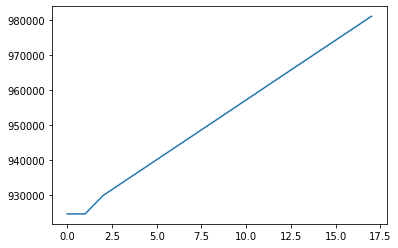

In [46]:
plt.plot(sample_z)

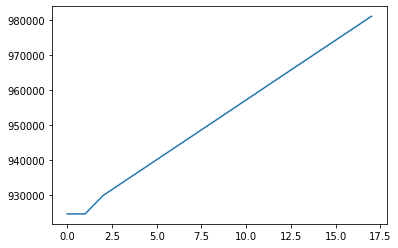

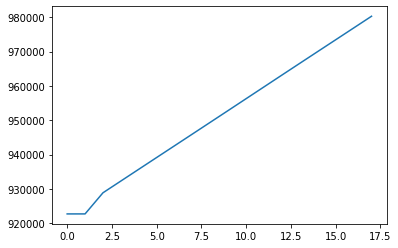

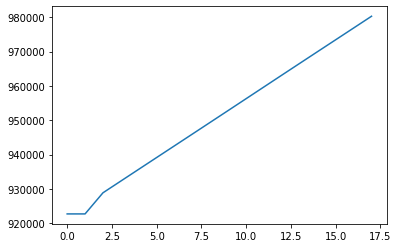

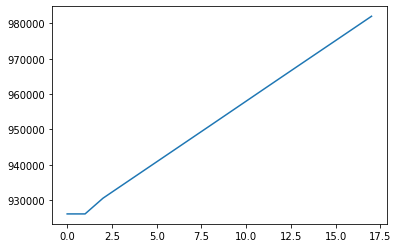

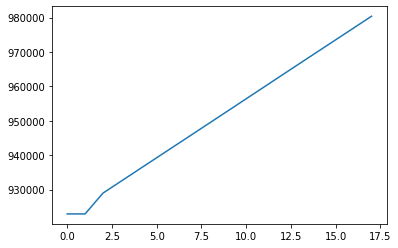

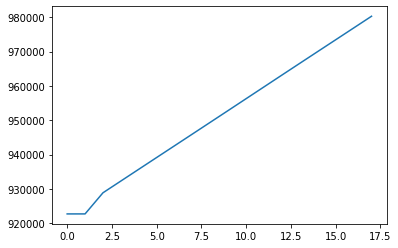

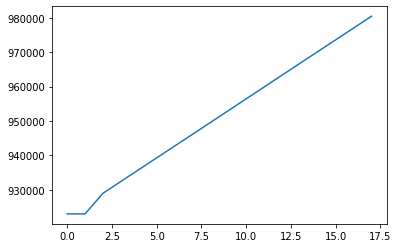

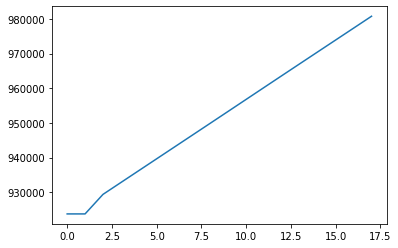

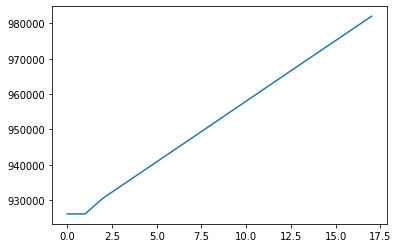

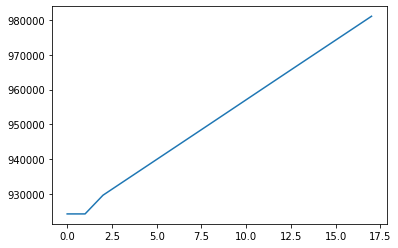

In [48]:
counter = 10
for k in nodes_df_gb.groups:
    if counter <= 0:
        break
    
    plt.figure()
    plt.plot(nodes_df_gb.groups[k])
    
    counter -= 1